In [2]:
# 사용하는 라이브러리
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# seaborn scheme,  font_scale setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 1. Data Set Check

In [4]:
# zip 파일에서 data 압축풀기
titanic_zip = zipfile.ZipFile('E:/github/Titanic/data/titanic.zip')
titanic_zip.extractall('E:/github/Titanic/data')
titanic_zip.close()

In [5]:
# train, test data 불러오기
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [6]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [7]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
print(train.columns)
print(train.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 변수 정리
PassengerId : 고객 ID, 없어도 되는 변수, int64  
Survived : 생존여부, target 변수, int64  
Pclass : 고객 class, int64  
Name : 이름, 없어도 되는 변수, object  
Sex : 성별, object  
Age : 나이, float64 (결측이 있을 가능성이 있음)  
SibSp : 함께 탑승한 형제 or 배우자 수, int64  
Parch : 함께 탑승한 부모, 아이 수, int64  
Ticket : 티켓번호, object  
Fare : 탑승료, float64 (결측이 있을 가능성이 있음)  
Cabin : 객실 번호, object  
Embarked : 탑승 항구, object  

- 변수만 보고 생각해 볼 만한 것
    - 고객ID, 이름은 제거 가능
    - 나이와 ,Fare는 결측이 있을 수도 있음
    - SibSp와 Parch는 합쳐서도 볼 수 있음, 0일 때와 아닐 때의 생존여부 차이 확인
    - 티켓번호와, 객실번호, class는 연관성이 있을 수 있음
    - age와 carbin이 전체 891개에서 개수가 부족함

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- count값을 보았을 때, passengerId(전체기준으로 봄)와 다른 값을 가진 변수가 있음(결측이 있을 가능성이 높음)    
-> 시각화가 필요함

## 1.1 Null data check

In [11]:
for col in train.columns :
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col,100*(train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :   Survived	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 19.87%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.00%
column :      Cabin	 Percent of NaN value : 77.10%
column :   Embarked	 Percent of NaN value : 0.22%


{:>10} 는 해당 출력물을 오른쪽 정렬하는 코드, \t는 탭하여 줄맞추어 다음 결과 출력  
{:.2f} 는 소숫점 둘째자리까지 출력하는 코드, .2가 소숫점을 표시, f는 실수로 표현(없으면 지수형으로 나옴)

In [12]:
for col in test.columns :
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 20.57%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.24%
column :      Cabin	 Percent of NaN value : 78.23%
column :   Embarked	 Percent of NaN value : 0.00%


<AxesSubplot:>

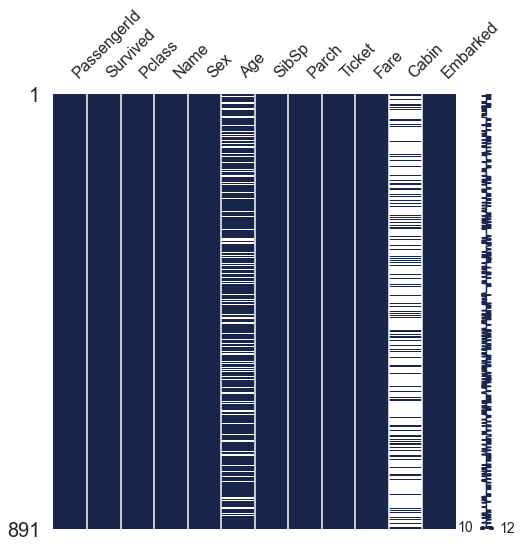

In [13]:
# missingno 함수를 사용한 결측값 시각화
msno.matrix(df=train, figsize=(8, 8), color=(0.1, 0.15, 0.3))

<AxesSubplot:>

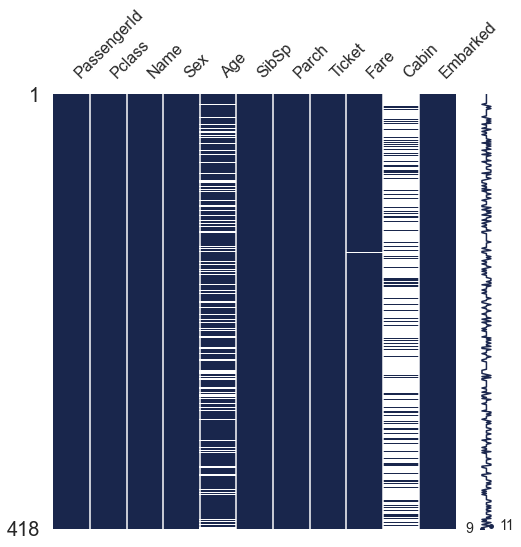

In [14]:
# test data 결측 시각화
msno.matrix(df=test, figsize=(8, 8), color=(0.1, 0.15, 0.3))

<AxesSubplot:>

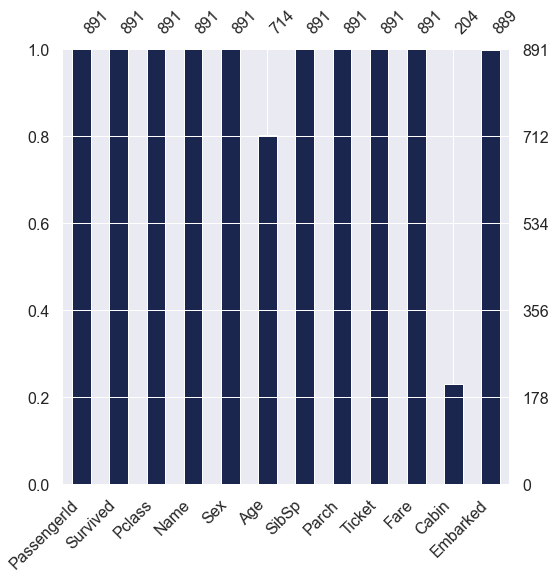

In [15]:
msno.bar(df=train, figsize=(8, 8), color=(0.1, 0.15, 0.3))

<AxesSubplot:>

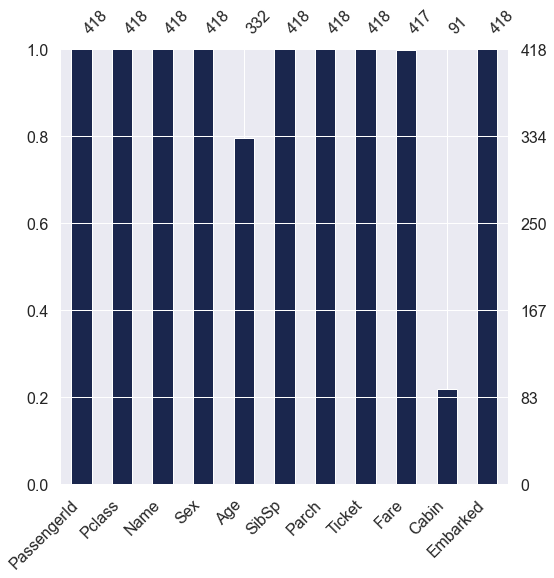

In [16]:
msno.bar(df=test, figsize=(8, 8), color=(0.1, 0.15, 0.3))

결과  
- train : Age(19.87%), Cabin(77.10%), Embarked(0.22%) 결측
- test : Age(20.57%), Fare(0.24%), Cabin(78.23%) 결측  
Age, Embarked, Fare의 결측을 해결하는 방법을 찾고 Cabin은 제거하는 방향으로 가야할 듯  
- 너무 적은 결측이 있는 것들은 msno의 시각화에서 보이지 않음, matrix보단 bar가 수치 체크에는 더 좋을 듯


## 1.2 Target label check
- target label의 분포 확인 : 1과 0의 분포에 따라 모델의 평가 방법이 달라짐

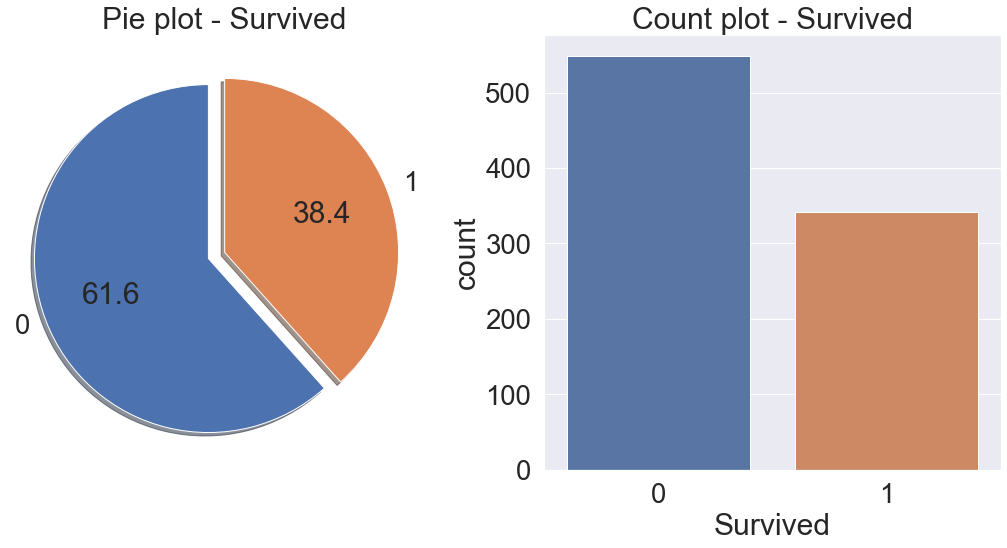

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Survived'].value_counts().plot.pie(explode=[0.1, 0], autopct='%1.1f', ax=ax[0], shadow=True, startangle=90)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

explode=[0, 0.1] : 두 조각간의 거리, [subplot안에서 멀어짐, subplot 밖으로 멀어짐]  
autopct='%1.1f%%' : 각 범주가 데이터에서 차지하는 비율, %1.1f%% 는 첫%는 포맷이 사용가능하게 함, .1f는 소숫점 첫째자리까지 출력, 뒤의 %%를 제거하면 %가 값에서 제거    
ax=ax[0] : subplot에서 출력되는 위치 지정(0부터 시작)  
shadow=True : 그림자 여부  
startangle=90 : pie plot이 시작하는 각도  

- 전체의 38.4%의 인원만 생존(300명이 조금 넘음)
- 너무 치우친 데이터는 X  
(100개중 불량품 1개가 나오는 희귀현상 같은 경우에는 제대로 된 결과를 예측, 분류할 수  없음)

# 2. Exploratory Data Analysis(EDA)
- 데이터 안에 숨겨진 사실을 찾기 위해 적절한 시각화 필요
- matplotlib, seaborn, plotly등의 라이브러리 사용

## 2.1 Pclass
- ordinary, 순서형 데이터
- Pclass에 따른 생존률의 차이
- pivot, groupby 사용

In [18]:
# Pclass별로 사람이 얼마나 있었는지 가져오기
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


- 데이터 불러오는 법  
    1개일 때 : 데이터프레임['변수']  
    2개 이상일 때 : 데이터프레임[['변수','변수2']]  
- as_index=True는 groupby에서 지정한 그룹을 인덱스로 지정

In [19]:
# 생존한 사람만 출력 (Survived에 1인 값만 가져옴)
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
# crosstab 함수를 사용하여 한번에 보기
pd.crosstab(train['Pclass'],train['Survived'], margins=True).style.background_gradient(cmap='rainbow')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


margins=True : 행과 열 기준으로 합계를 같이 제시

<AxesSubplot:xlabel='Pclass'>

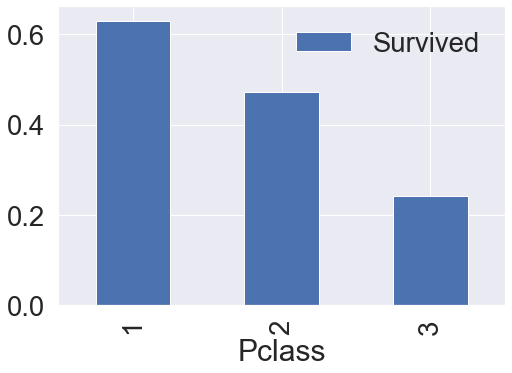

In [21]:
# 각 클래스별 생존률 막대 그래프로 보기
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- class가 높을수록 생존률이 높다

그래프에 값을 추가하면 더 좋을 것 같다.

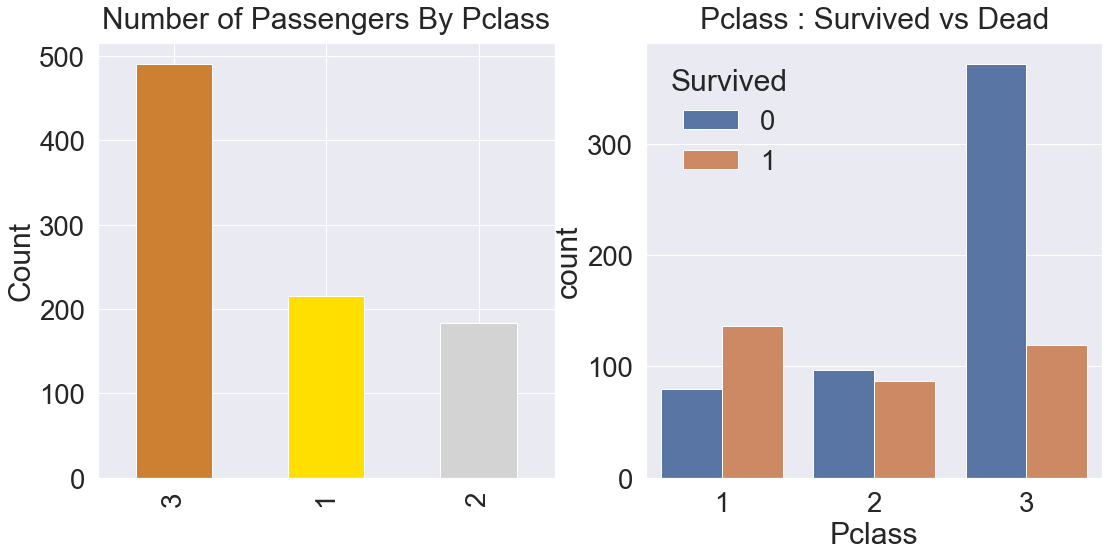

In [22]:
# Pclass별 인원 파악, 생존여부 비교
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

- Pclass인원은 3이 제일 많고 그 다음이 1, 2 순서
- 생존율은 1, 2, 3 순서로 class가 영향을 준다고 봄 (class마다 머물렀던 위치도 다를 것)

- 함수 설명
y_position : y의 원하는 위치 지정 (0이면 그래프 0값 위에, 1이면 그래프 바로 위에 지정됨)  
그래프마다 꼭 ax를 지정해줄 것

## Sex
- 성별과 생존률 시각화

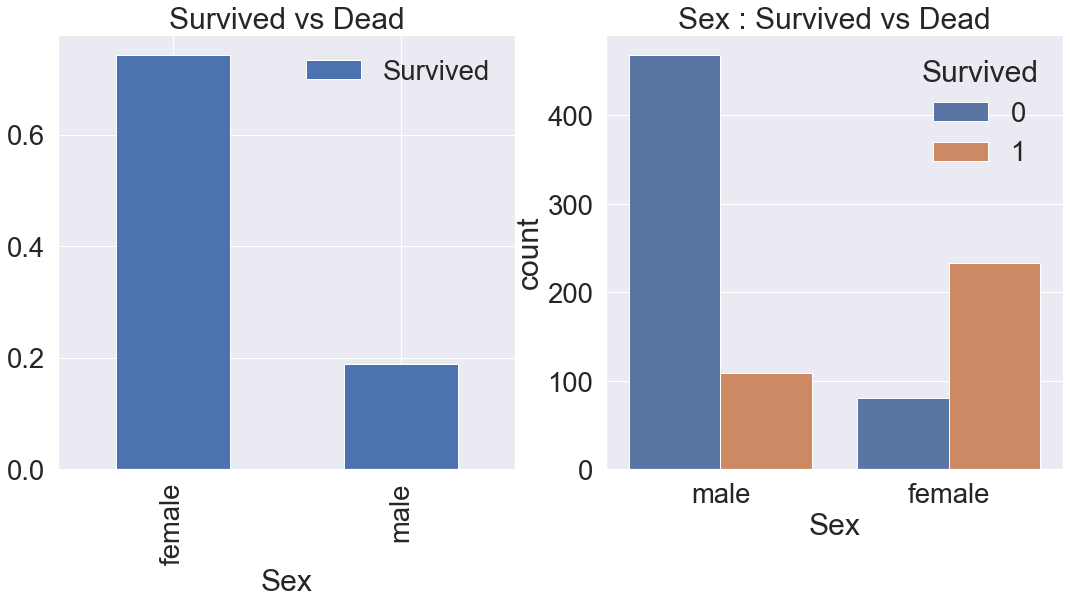

In [23]:
# 성별별 생존율, 생존여부 시각화
f, ax = plt.subplots(1, 2, figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Dead')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

여자의 생존율이 높음 (Pclass가 높은 사람이 여자가 많았는가?를 생각해봄)

In [24]:
# 성별별 생존률 표로 출력
train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [25]:
# crosstab을 사용하여 성별별 생존여부 결과 출력
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='rainbow')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass
- Sex, Pclass와 생존여부의 관계 파악
- seaborn의 factorplot을 이용

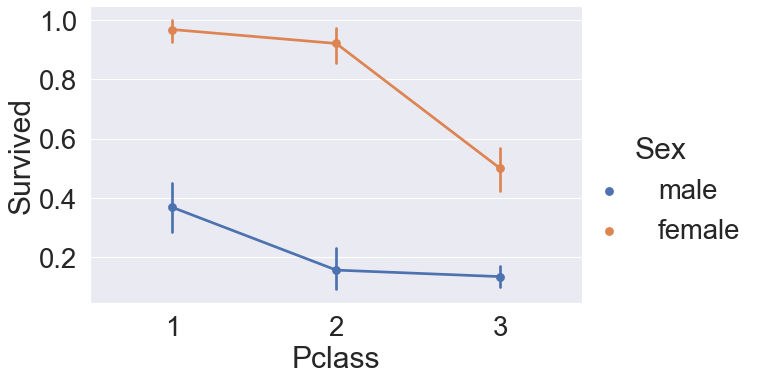

In [26]:
# 성별별, Pclass의 생존여부 보기
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size=6, aspect=1.5)

- 여성의 경우 1,2 클래스에서는 대부분이 생존하고, 3클래스 일 때 생존율이 현저히 떨어짐
- 남성의 경우 전체적으로 낮지만 1클래스에서 그나마 많은 인원이 생존, 나머지 클래스에서는 생존율이 많이 낮음  

- 함수설명  
size : 그래프의 전체 크기  
aspect : 좌우 크기  
(height : 상하 크기)

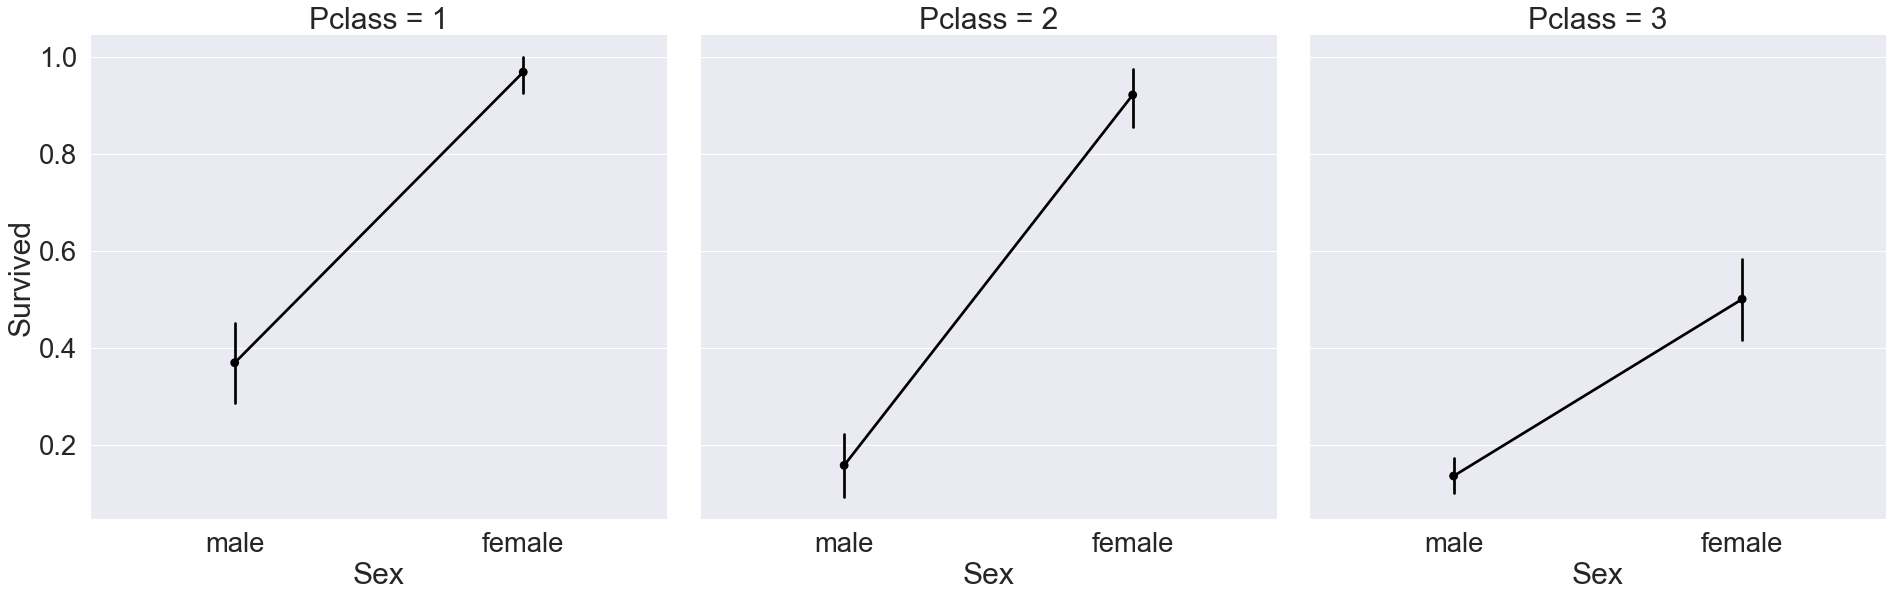

In [27]:
# Pclass별로 성별과 생존여부 그래프 그리기
sns.factorplot('Sex', 'Survived', col='Pclass', data=train, size=9, aspect=1, color='black')

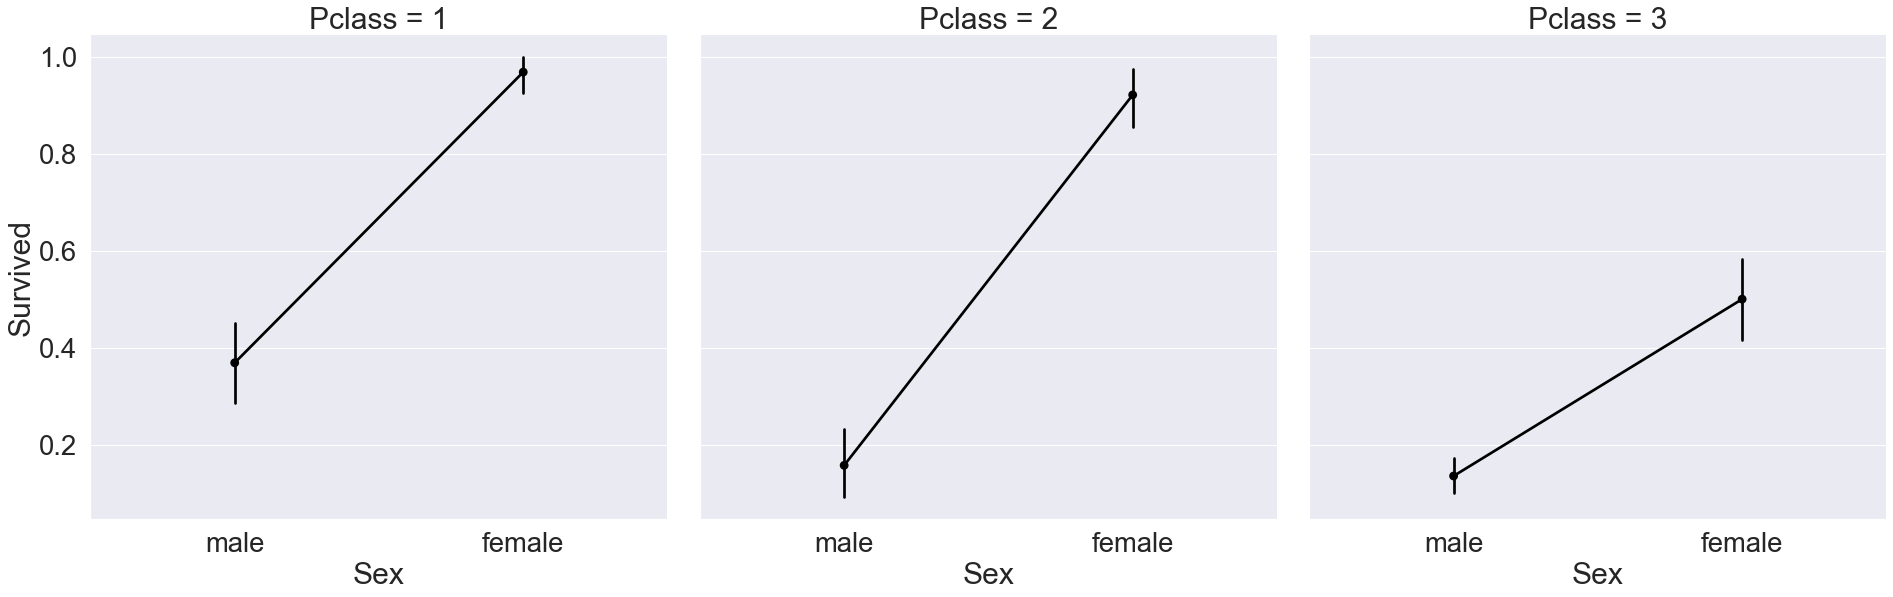

In [28]:
# Pclass별로 성별과 생존여부 그래프 그리기
sns.factorplot('Sex', 'Survived', col='Pclass', data=train, size=9, aspect=1, color='black')

- 함수 설명  
col : 지정된 변수 값 별로 그래프를 그려줌  
satureation : 알 수 없는 옵션이라 삭제  
(참고 홈페이지 : https://www.geeksforgeeks.org/python-seaborn-factorplot-method/)

## 2.4 Age
- Age 파악
- Age 별 생존여부 파악

In [29]:
print('제일 나이 많은 승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 나이 어린 승객 : {:.1f} Years'.format(train['Age'].min()))
print('승객 평균 나이 : {:.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 승객 : 80.0 Years
제일 나이 어린 승객 : 0.4 Years
승객 평균 나이 : 29.7 Years


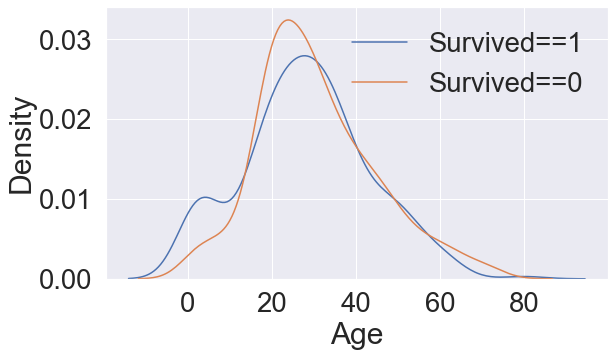

In [30]:
# Age에 따른 생존여부별 histogram 그래프
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(train[train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

- 0세 이하, 80세 이상은 없으나 위에선 그래프를 위해 표현됨
- 생존율은 20 ~ 40대가 많이 생존

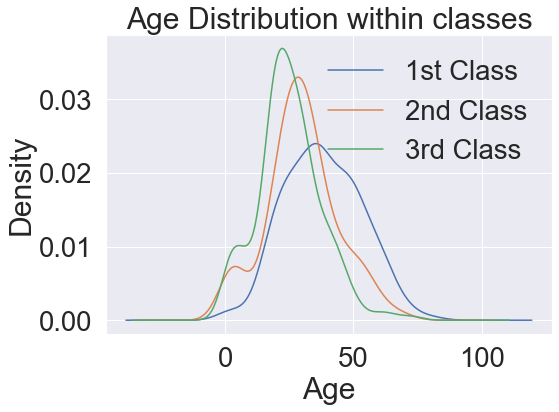

In [31]:
# 나이에 따른 Pclass별 histogram 그래프
train[train['Pclass']==1]['Age'].plot(kind='kde')
train[train['Pclass']==2]['Age'].plot(kind='kde')
train[train['Pclass']==3]['Age'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])
plt.show()

- 클래스가 3에 가까울수록 연령대가 높음
- 나이도 어리고 Pclass가 1에 가까운 사람들이 많이 생존

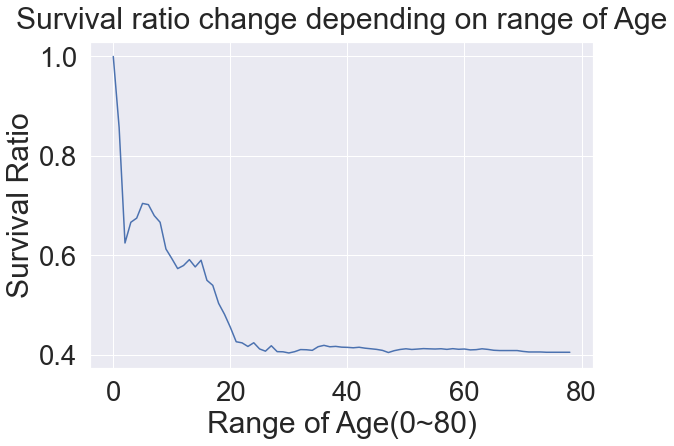

In [32]:
# Age의 누적 생존 비율 그래프 그리기
cummulate_survival_ratio = []
for i in range(1, 80) :
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))

plt.figure(figsize = (9,6))
plt.plot(cummulate_survival_ratio)
plt.title('Survival ratio change depending on range of Age', y=1.02)
plt.ylabel('Survival Ratio')
plt.xlabel('Range of Age(0~80)')
plt.show()

- 나이가 20 미만일 때 많은 인원이 생존
- 20대 이후에는 생존율이 0.4로 비슷함

## 2.5 Pclass, Sex, Age
- Pclass, sex, Age 별 생존여부 시각화

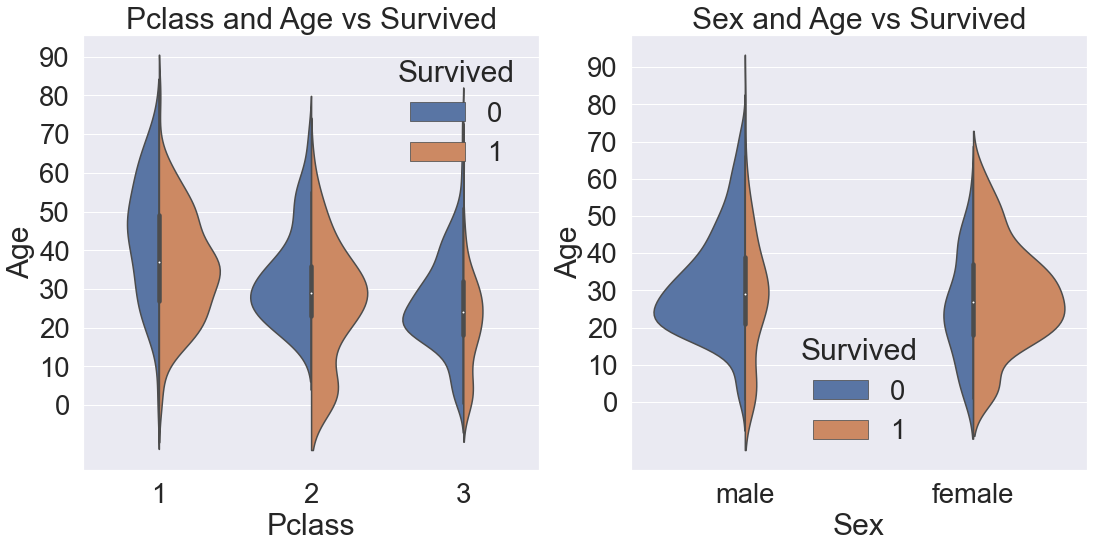

In [33]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,100,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,100,10))

plt.show()

- 1st class는 어릴수록 생존율이 높음, 2nd class는 비슷하지만 아주 어린 사람이 생존율이 높음, 3rd class는 전체적으로 생존율이 낮음
- 남자는 전체적으로 생존율이 낮지만 어린 사람이 생존율이 높음, 여자는 전체적으로 생존율이 높음
- 위에서 확인한 결과 한 번 더 확인

- 함수설명  
split : 그래프 1개를 반으로 나누어 표현  
set_yticks : y축의 범례 범위를 지정  

## 2.6 Embarked
- 탑승한 항구와 생존여부 시각화

<AxesSubplot:xlabel='Embarked'>

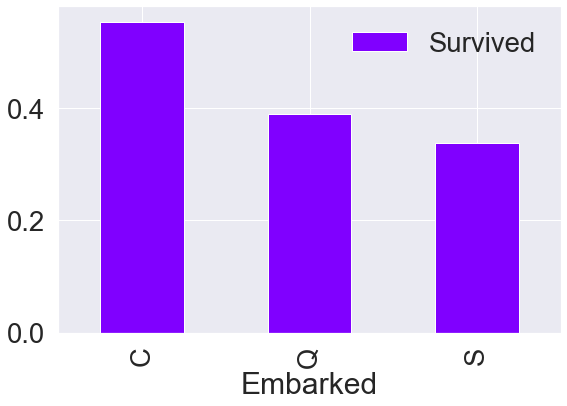

In [34]:
f, ax = plt.subplots(1, 1, figsize=(9,6))
train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(cmap='rainbow',ax=ax)

- C의 항구에서 탑승한 고객이 생존율이 높음, 대체로 비슷
- 차이가 보이기에 모델에 사용

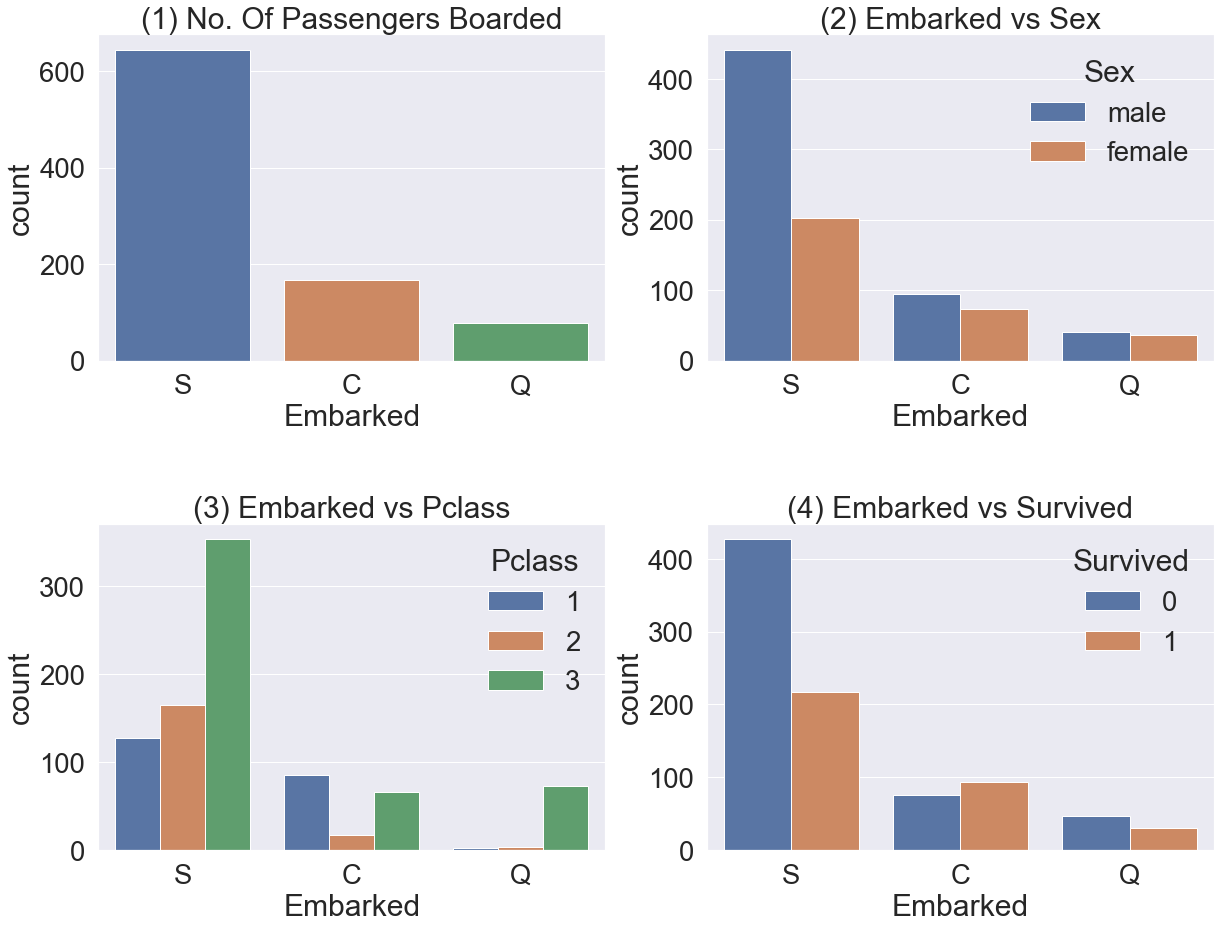

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

# 항구별 탑승 인원
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

# 항구, 성별 별 탑승 인원
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('(2) Embarked vs Sex')

# 항구, Pclass별 탑승 인원
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Pclass')

# 항구, 생존여부별 탑승 인원
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Survived')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- S항구에서 많은 사람이 탑승
- S항구는 유독 남자 비율이 많음, 다른 두 항구도 남자가 많지만 거의 비슷
- S항구의 탑승객은 3rd class가 많고 대부분의 2nd class 탑승객이 이 곳에서 탐, C항구는 1st class와 3rd class가 비슷, Q항구는 3rd 탑승객만 탐

- 함수 설명  
subplots_adjust : subplot 옵션
wspace : subplot별 너비 공간
hspcae : subplot별 높이 공간

## 2.7 Family - SibSp(형제자매) + Parch(부모, 자녀)
- 합쳐서 Family로 봄

In [36]:
# 본인을 포함한 가족 크기 구하기
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [37]:
# 가족 max, min 확인
print('Maximum Family Size : {:.0f}'.format(train['FamilySize'].max()))
print('Minimum Family Size : {:.0f}'.format(train['FamilySize'].min()))

Maximum Family Size : 11
Minimum Family Size : 1


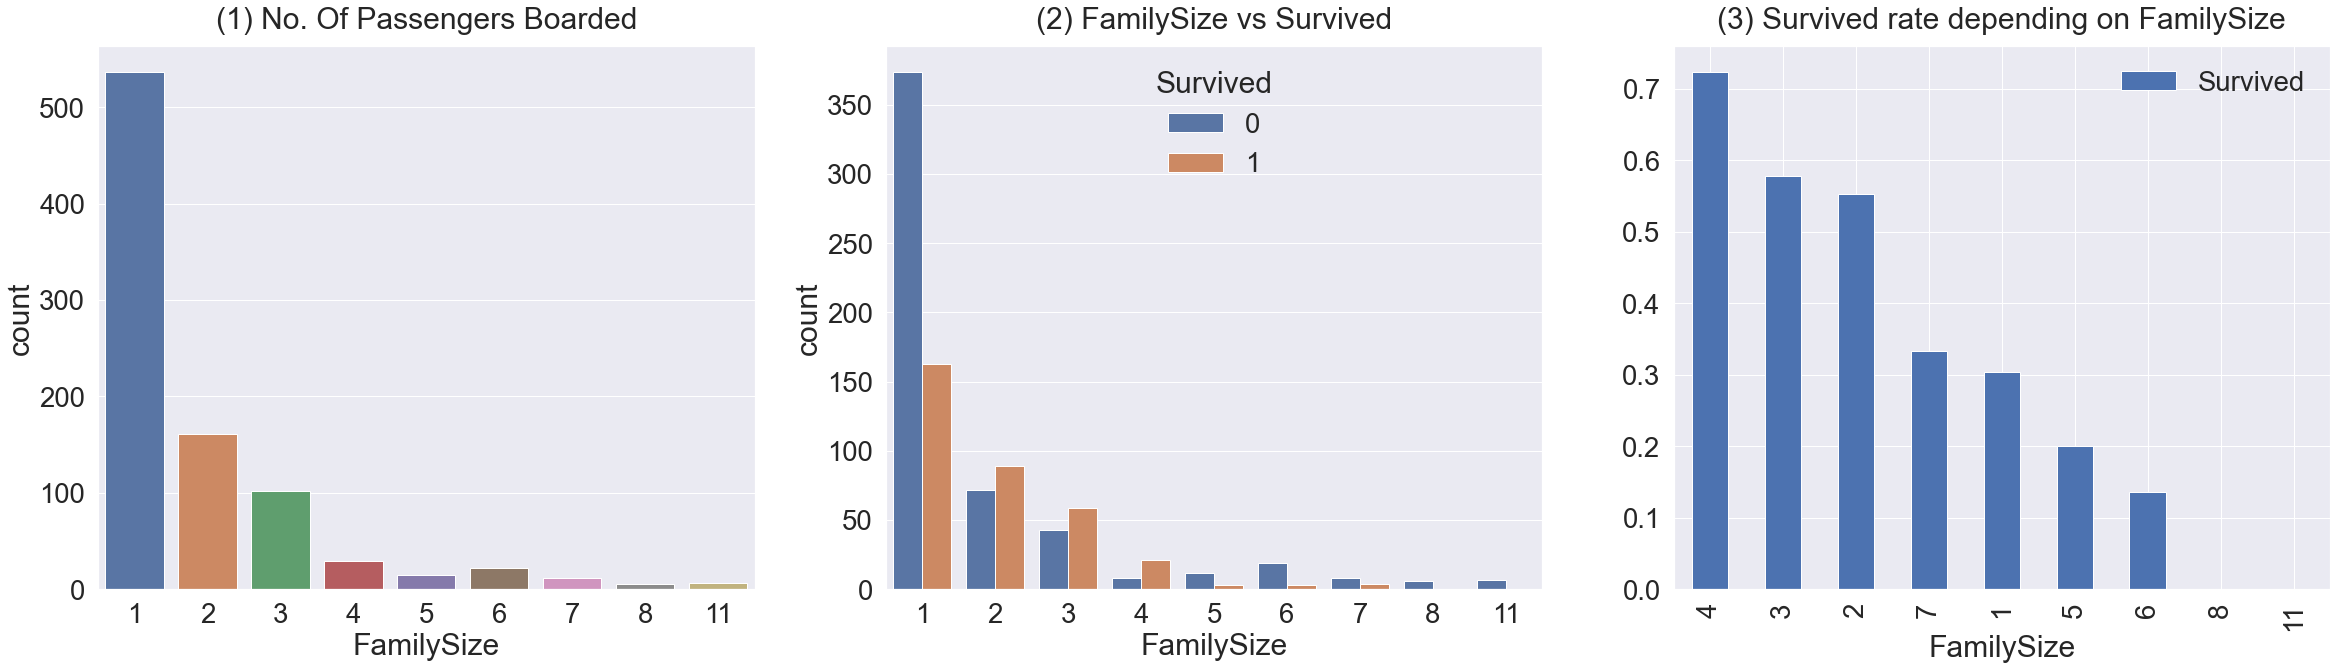

In [38]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

# 가족 인원별 탑승 인원 
sns.countplot('FamilySize', data=train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# 가족 인원별 생존여부
sns.countplot('FamilySize', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('(2) FamilySize vs Survived', y=1.02)

# 가족 인원별 생존율
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 가족 크기는 3명 이하의 인원이 대부분
- 혼자 온 사람의 사망한 인원이 많았으며, 가족이 5명 이상일 경우 사망한 경우도 많음(그룹화 가능할 듯..? 혼자, 소가족, 대가족으로)
- 생존율은 2~4명일 때가 가장 높고 7명과 혼자, 나머지 크기 순임

## 2.8 Fare
- 탑승 요금에 따른 생존여부 시각화

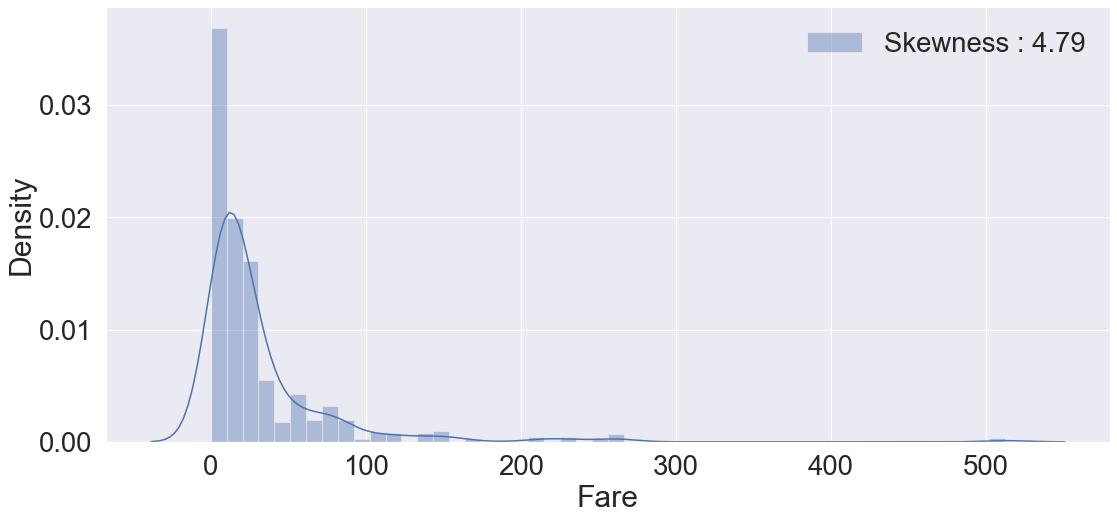

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g= g.legend(loc='best')

- 요금의 분포 (Skewness(왜도)를 봄으로서 얼마나 치우쳐 있는지 확인 가능)
- 너무 치우쳐 있기에 모델에 영향을 줄 수 있음(feature engineering에서 log 변환 할 예정)

code  
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

train['Fare'] = train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

test['Fare'] = test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)


## 2.9 Cabin
- NaN이 80% 이상이므로 파악이 어려움

In [40]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## 2.10 Ticket
- NaN은 없지만 너무 다양한 값을 가짐
- 사용하기 위해 변수의 값 파악 및 아이디어 필요

In [41]:
#pd.set_option('display.max_rows', 1000)
print(train['Ticket'].value_counts())

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


- 함수 설명  
pd.set_option('display.max_row', 1000) : 결과에 뜨는 행을 1000개까지 출력

# 3. Feature engineering
- null data 대체(채우는 값에 따라 모델 성능에 큰 영향을 줌)
- train과 test 동일하게 적용해야 함

## 3.1 Fill null
### 3.1.1 Fill Null in Age using title
- Age : 177 null
- 이름의 호칭을 기준으로 Initial이란 변수를 생성하여 Initial의 나이 평균값으로 결측 대체

In [67]:
# 이름에서 호칭만 따로 빼오기
train['Initial'] = train['Name'].str.extract('([A-Za-z]+)\.')
test['Initial'] = test['Name'].str.extract('([A-Za-z]+)\.')
train['Initial']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Initial, Length: 418, dtype: object

- 함수 설명  
str : 문자열 함수를 사용하거나 전처리할 때 필수  
extract : 원하는 문자열 추출 (참고 : https://wikidocs.net/4308), 위의 [A-Za-z]는 모든 알파벳을 뜻함 제일 첫자리 하나만 출력, +는 앞의 형식이 한 번이상 반복되는 것 전부(여기서는 단어를 불러옴),\.은 .이 붙은 문자, 알파벳([A-Za-z])으로 이루어진 그룹(+, 단어)인데 .이 붙은 단어 찾기 (참고 : https://ggodong.tistory.com/3)

In [74]:
# 호칭에 따른 남녀 비율 확인
pd.crosstab(train['Initial'],train['Sex']).T.style.background_gradient(cmap='rainbow')

#print(train['Initial'].unique())

Initial,Miss,Mr,Mrs,other
Sex,,,,
female,188,0,125,1
male,0,571,0,6


- 남자는 Mr, Master로 여자는 Miss, Mrs로 많이 호칭

In [72]:
train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'],
                         ['Mr', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'other', 'Miss', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr'], inplace=True)
train['Initial'].value_counts()

Mr       571
Miss     188
Mrs      125
other      7
Name: Initial, dtype: int64

In [73]:
pd.crosstab(test['Initial'],test['Sex']).T.style.background_gradient(cmap='rainbow')

Initial,Miss,Mr,Mrs,other
Sex,,,,
female,80,0,72,0
male,0,265,0,1


In [70]:
test['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Dona', 'Col', 'Dr', 'Rev', 'Ms'],
                        ['Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mr', 'other', 'Mr', 'Miss'], inplace=True)
pd.crosstab(test['Initial'],test['Sex']).T.style.background_gradient(cmap='rainbow')

Initial,Miss,Mr,Mrs,other
Sex,,,,
female,80,0,72,0
male,0,265,0,1


In [83]:
test.groupby('Initial').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,
Miss,1102.812500,2.425000,22.039846,0.537500,0.387500,40.543804,1.925000
Mr,1102.309434,2.339623,30.161324,0.377358,0.271698,27.322080,1.649057
Mrs,1090.097222,1.833333,38.903226,0.597222,0.833333,59.974249,2.430556
other,1185.000000,1.000000,53.000000,1.000000,1.000000,81.858300,3.000000


- trian 데이터에서 여성인 Miss와 Mrs는 생존율이 0.7이상이고 남자인 Mr은 생존율이 0.2미만

In [96]:
# Age 결측 평균값 대체 (train과 같은 조건을 하기 위해 test에도 동일하게 지정)
train.loc[(train['Age'].isnull())&(train['Initial']=='Mr'),'Age'] = 31
train.loc[(train['Age'].isnull())&(train['Initial']=='Miss'),'Age'] = 22
train.loc[(train['Age'].isnull())&(train['Initial']=='Mrs'),'Age'] = 36
train.loc[(train['Age'].isnull())&(train['Initial']=='other'),'Age'] = 42

test.loc[(test['Age'].isnull())&(test['Initial']=='Mr'),'Age'] = 31
test.loc[(test['Age'].isnull())&(test['Initial']=='Miss'),'Age'] = 22
test.loc[(test['Age'].isnull())&(test['Initial']=='Mrs'),'Age'] = 36
test.loc[(test['Age'].isnull())&(test['Initial']=='other'),'Age'] = 42

In [97]:
# Age 확인
train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

### 3.1.2 Fill Null in Embarked
- Null 2개, 가장 많은 값인 S로 대체

In [107]:
print('Embarked has', sum(train['Embarked'].isnull()), 'Null value')

Embarked has 0 Null value


In [106]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'

## 3.2 Change Age(continuous to categorical)
- 나이를 구간화하기(10대, 20대, 30대 등)